# Unsupervised learning: 

Author: Tijs van Lieshout

Machine learning methods for data without labels.
The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

We can categorize the unsupervised learning techniques to these categories:

1: Based on observations:

    2.3. Clustering
        2.3.1. Overview of clustering methods
        2.3.2. K-means
        2.3.3. Affinity Propagation
        2.3.4. Mean Shift
        2.3.5. Spectral clustering
        2.3.6. Hierarchical clustering
        2.3.7. DBSCAN
        2.3.8. OPTICS
        2.3.9. Birch
        2.3.10. Clustering performance evaluation
        
    2.2. Manifold learning
        2.2.1. Introduction
        2.2.2. Isomap
        2.2.3. Locally Linear Embedding
        2.2.4. Modified Locally Linear Embedding
        2.2.5. Hessian Eigenmapping
        2.2.6. Spectral Embedding
        2.2.7. Local Tangent Space Alignment
        2.2.8. Multi-dimensional Scaling (MDS)
        2.2.9. t-distributed Stochastic Neighbor Embedding (t-SNE)
        2.2.10. Tips on practical use

2: Based on features:
    
    2.5. Decomposing signals in components (matrix factorization problems)
        2.5.1. Principal component analysis (PCA)
        2.5.2. Truncated singular value decomposition and latent semantic analysis
        2.5.3. Dictionary Learning
        2.5.4. Factor Analysis
        2.5.5. Independent component analysis (ICA)
        2.5.6. Non-negative matrix factorization (NMF or NNMF)
        2.5.7. Latent Dirichlet Allocation (LDA)

3: Based on Distributions:
    
    2.1. Gaussian mixture models
        2.1.1. Gaussian Mixture
        2.1.2. Variational Bayesian Gaussian Mixture
    
    2.8. Density Estimation
        2.8.1. Density Estimation: Histograms
        2.8.2. Kernel Density Estimation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Example data sets

### Simple data set with no PCA required

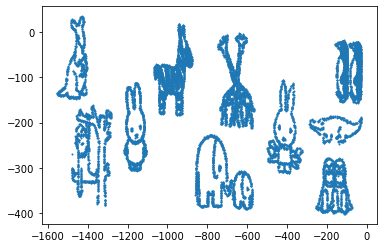

In [2]:
X = np.loadtxt('cirbanduk2.dat')
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()

### Cartesian coordinates data set with many features, PCA required

In [3]:
data = pd.read_csv('1L63-fit.dat.gz', sep='\s+', header=None)
X2 = data.values[:, 3:].reshape((2001, -1)).astype(float)

In [4]:
mean = np.mean(X2, axis=0)
X2 = X2 - mean
# X /= X.std(axis=0) No standard deviation because of cartesian data
# covariance matrix
cov = np.cov(X2.T)
# eigenvalues, eigenvectors
vals, vecs = np.linalg.eigh(cov)
# sort eigenvectors
idxs = vals.argsort()[::-1]
vals = vals[idxs]
vecs = vecs[:, idxs]
# project
proj = np.dot(X2, vecs)

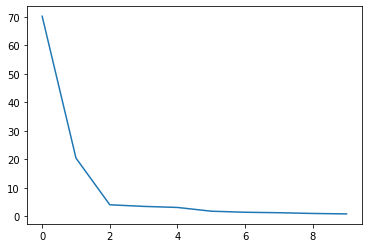

In [5]:
plt.plot(vals[:10])
plt.show()

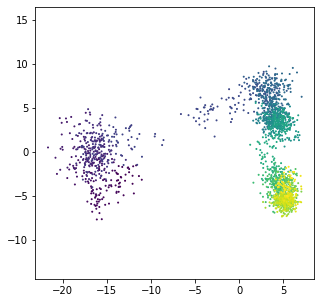

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:,0], proj[:,1], c=np.arange(2001), s=1)
plt.show()

## Gaussian Mixture

### cirbanduk2: Bad

In [7]:
from sklearn.mixture import GaussianMixture

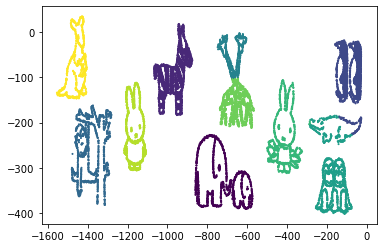

In [8]:
gm = GaussianMixture(n_components=10, covariance_type='full').fit_predict(X[:,:2])
plt.scatter(X[:, 0], X[:, 1], c=gm, s=1)
plt.show()

### 1L63-fit: Good

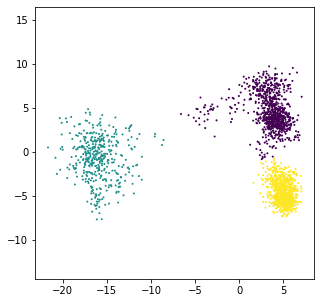

In [9]:
gm = GaussianMixture(n_components=3, covariance_type='full').fit_predict(proj[:,:2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=gm, s=1)
plt.show()

### Advantages:
1. It is the fastest algorithm for learning mixture models
2. As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

### Disadvantage
1. When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
2. This algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.



## KMeans

### cirbanduk2: Bad

In [10]:
from sklearn.cluster import KMeans

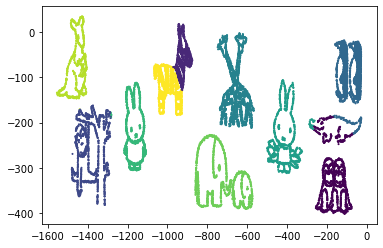

In [11]:
km10 = KMeans(10).fit_predict(X[:,:2])
plt.scatter(X[:, 0], X[:, 1], c=km10, s=1)
plt.show()

### 1L63-fit: Good

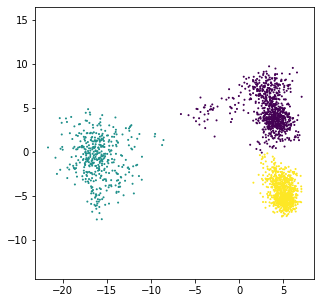

In [12]:
km3 = KMeans(3).fit_predict(proj[:,:2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=km3, s=1)
plt.show()

### Advantages:
1. Simple
2. Quick

### Disadvantage
1. The metric used is Euclidean distance, and variance is a measure of cluster scatter. If
clusters have different variances for example, K-means can fail to cluster them. Clusters
are also expected to be spherical-shaped (or convex). For example, this is not the case in
the examples of figure 1.1, and it is seen that K-means does not work properly here.

2. The number of clusters k is an input parameter. When k is chosen incorrectly, the
algorithm may give poor results. To prevent this, diagnostic checks should be run on the
number of clusters (see also section 7.1).

3. The algorithm converges to a local minimum instead of the global minimum which may
produce poor results. See figure 3.5 for an example of this. This can be prevented by
running the algorithm multiple times and choosing the best result of the runs.

## Hierarchical

### cirbanduk2: almost good

In [13]:
from sklearn.cluster import AgglomerativeClustering

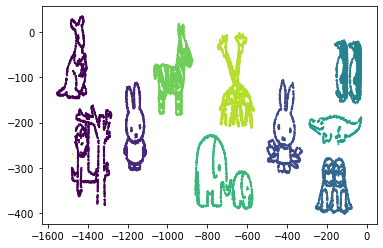

In [14]:
agg = AgglomerativeClustering(n_clusters=10, linkage='single').fit_predict(X[:, :2])
# linkages to try: (‘ward’, ‘complete’, ‘average’, ‘single’)
plt.scatter(X[:, 0], X[:, 1], c=agg, s=1)
plt.show()

### 1L63-fit: Good

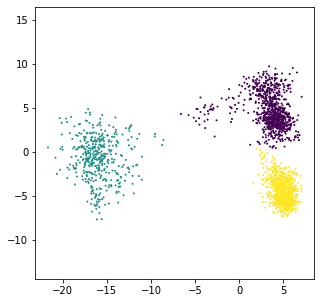

In [15]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(proj[:, :2])
# linkages to try: (‘ward’, ‘complete’, ‘average’, ‘single’)
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=agg, s=1)
plt.show()

### Advantages:
1. large number of samples 
2. large number of clusters 
3. it can work with many data types.

### Disadvantage
1. The time complexity of this method is high
2. method is rigid, i.e. once a merging or a splitting is done, it cannot be undone in a following iteration.
3. Based on the choice of distance metric it can have specific disadvantages, for example the method may become sensitive to noise and outliers.

## Spectral

### cirbanduk2: runtime too long!

In [16]:
from sklearn.cluster import SpectralClustering

In [17]:
# spec = SpectralClustering(n_clusters=10).fit_predict(X[:, :2])
# plt.scatter(X[:, 0], X[:, 1], c=spec, s=1)
# plt.show()

### 1L63-fit: Good

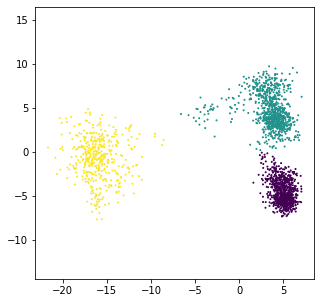

In [18]:
spec = SpectralClustering(n_clusters=3).fit_predict(proj[:, :2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=spec, s=1)
plt.show()

### Advantages:
1. Spectral clustering can be used when there are few clusters 
2. and the cluster size is approximately even.

### Disadvantage
1. This method is computationally expensive for large datasets.

## DBSCAN

### cirbanduk2: Good

In [19]:
from sklearn.cluster import DBSCAN

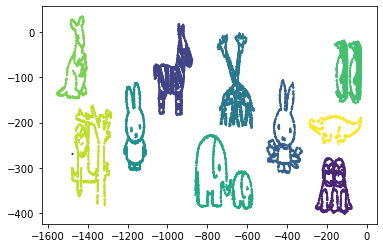

In [20]:
dbscan = DBSCAN(eps=20, min_samples=5).fit_predict(X[:,:2])
plt.scatter(X[:, 0], X[:, 1], c=dbscan, s=1)
plt.show()

### 1L63-fit: almost good

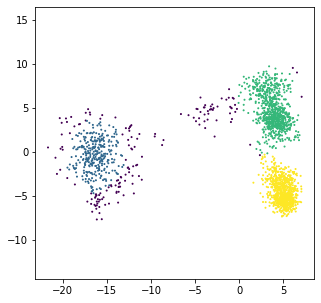

In [21]:
dbscan = DBSCAN(eps=1.5, min_samples=50).fit_predict(proj[:, :2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=dbscan, s=1)
plt.show()

### Advantages:
1. DBSCAN is suitable when dealing with a very large number of samples

### Disadvantage
1. DBSCAN cannot cluster data sets well when there are large differences in densities, as no
appropriate parameters can be chosen then for all clusters.
2. F\*cking around with parameters is suffering...

## OPTICS

### cirbanduk2: Good

In [22]:
from sklearn.cluster import OPTICS

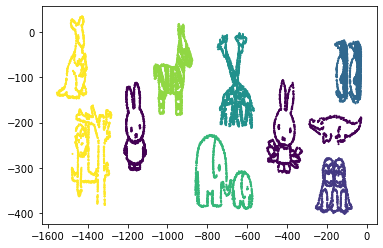

In [23]:
optics = OPTICS(min_samples=50, xi=.1, min_cluster_size=.07).fit_predict(X[:,:2])
plt.scatter(X[:, 0], X[:, 1], c=optics, s=1)
plt.show()

### 1L63-fit: good

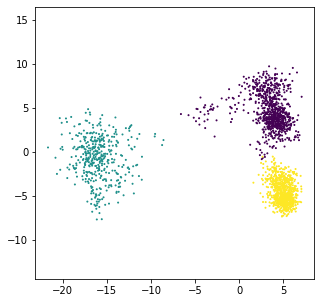

In [24]:
optics = OPTICS(min_samples=20, xi=.05, min_cluster_size=.05).fit_predict(proj[:, :2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=optics, s=1)
plt.show()

### Advantages:
1. Difference in density

### Disadvantage
1. Takes longer than DBSCAN to compute
2. Over sensitive for noise. This is in part because the first samples of each dense area processed by OPTICS have a large reachability value while being close to other points in their area, and will thus sometimes be marked as noise rather than periphery. 
2. F\*cking around with parameters is suffering...

## Robust covariance

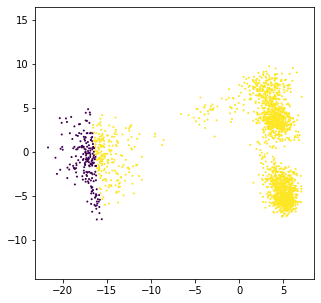

In [28]:
from sklearn.covariance import EllipticEnvelope

elleptic_envelope = EllipticEnvelope().fit_predict(proj[:,:2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=elleptic_envelope, s=1)
plt.show()

## OneClassSVM

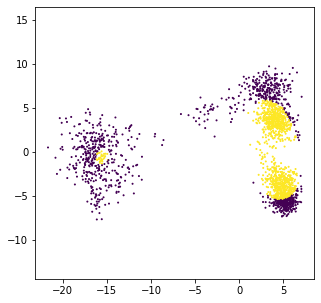

In [25]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM().fit_predict(proj[:,:2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=one_class_svm, s=1)
plt.show()

## IsolationForest

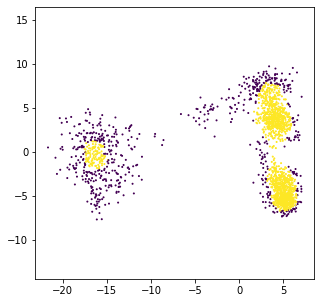

In [26]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest().fit_predict(proj[:,:2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=isolation_forest, s=1)
plt.show()

## LocalOutlierFactor

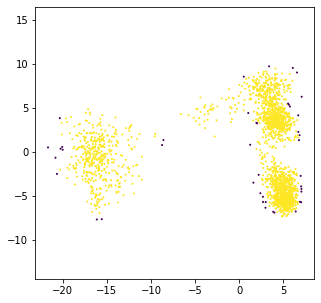

In [27]:
from sklearn.neighbors import LocalOutlierFactor

local_outlier_factor = LocalOutlierFactor().fit_predict(proj[:,:2])
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
ax.scatter(proj[:, 0], proj[:, 1], c=local_outlier_factor, s=1)
plt.show()